<a href="https://colab.research.google.com/github/shaileshsuthar675/Machine-Learning/blob/main/Spam%20Detection/Spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Creating a Multinomial Naives Bayes Classifier to predict whether given mail is spam or not**

#Mounting the google drive into notebook

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Importing the Data table from google colab for visualization of data

In [2]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

#Importing the respective libraries...

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Inserting the data file

In [62]:
df= pd.read_csv('/content/gdrive/MyDrive/machine learning /spam.csv')

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [64]:
df=df[['v1','v2']]

In [65]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [66]:
from sklearn.preprocessing import LabelEncoder
df.v1=LabelEncoder().fit_transform(df.v1)

In [67]:
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#Data visualization

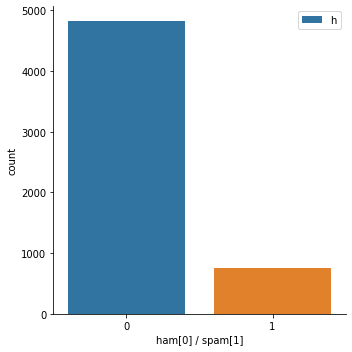

In [135]:
sns.catplot(data=df,x='v1',kind='count')
plt.xlabel('ham[0] / spam[1]')
plt.legend('ham')

#Creating Countvectorizer to extract the features of text

In [68]:
x=df.v2
from sklearn.feature_extraction.text import CountVectorizer
vector=CountVectorizer()
x_count=vector.fit_transform(x.values)
x_count=x_count.toarray()

#Develop the Multinomial naives bayes classifier to deal with spam detection

In [69]:
y=df.v1
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_count,y,test_size=0.2)

In [71]:
from sklearn.naive_bayes import MultinomialNB
model_NB=MultinomialNB()
model_NB.fit(x_train,y_train)
model_NB.score(x_test,y_test)

0.9820627802690582

In [73]:
email=["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
email_count=vector.transform(email)
model_NB.predict(email_count)

array([1])

In [74]:
from sklearn.model_selection import cross_val_score
model_v_score=cross_val_score(MultinomialNB(),x_test,y_test)

In [75]:
model_v_score

array([0.98654709, 0.95964126, 0.95067265, 0.98206278, 0.96412556])

In [76]:
x_count.shape

(5572, 8625)

#Creating TFIDF Vectorizer to extract the features of text

In [77]:
#By TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
x_count=tfidf.fit_transform(x.values)
x_count=x_count.toarray()

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_count,y,test_size=0.2)

In [79]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9659192825112107

In [80]:
cross_val_score(MultinomialNB(),x_test,y_test)

array([0.88789238, 0.88789238, 0.88340807, 0.89237668, 0.88340807])

In [127]:
df.v2[2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

#Prediction

In [124]:
def mail_checker(mail):
  mail=input('Enter short line mail to predict whether it is spam or not:\n')
  list_a=[2]
  list_a[0]=mail
  mail_count=vector.transform(list_a)
  pred=model_NB.predict(mail_count)
  pred=pred.reshape(-1,1)
  if pred[0]==1:
    print("This mail is Spam")
  else:
    print("This mail isn't Spam")

In [125]:
mail_checker(mail)

Enter short line mail to predict whether it is spam or not:
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, ��1.50 to rcv
This mail isn't Spam


In [126]:
mail_checker(mail)

Enter short line mail to predict whether it is spam or not:
are you aware about the cahs price that you won in dream11
This mail isn't Spam


In [128]:
mail_checker(mail)

Enter short line mail to predict whether it is spam or not:
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
This mail is Spam


#ML model creation from Pipeine module of sklearn to predict whether the mail is spam or not

In [137]:
x=df.v2
y=df.v1
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

from sklearn.pipeline import Pipeline
clf=Pipeline([('vectorizer',CountVectorizer()),('nb',MultinomialNB())])
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.9910313901345291

In [139]:
cvs=cross_val_score(clf,x_test,y_test)

#Accuracy score

In [140]:
cvs.mean()

0.9811659192825111